### BIKE SHARING ASSIGNMENT

##### Reading and Understanding the Data

In [1]:
#Import warnings

import warnings
warnings.simplefilter('ignore')

In [2]:
#Importing libraries

import numpy as np, pandas as pd
import seaborn as sns , matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Loading the data

boom_bikes= pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# extracting information on the dataset
boom_bikes.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#shape of the dataset

boom_bikes.shape

(730, 16)

In [6]:
#Inspecting the null values in the dataset

boom_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Checking the values in different columns

boom_bikes.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
730      31-12-2019  1       1   12    0        2        1           2           8.849153   11.17435  57.7500  10.374682  439     2290        2729    1
251      08-09-2018  3       0   9     0        6        0           3           25.990433  27.76805  93.9565  12.914116  153     1689        1842    1
249      06-09-2018  3       0   9     0        4        1           3           22.140000  25.76000  88.6957  23.044181  204     2506        2710    1
248      05-09-2018  3       0   9     1        3        0           2           27.606653  31.28230  79.0417  14.250632  1236    2115        3351    1
247      04-09-2018  3       0   9     0        2        1           1           29.075847  33.27145  74.2083  13.833289  2521    2419        4940    1
                                                                                             

In [8]:
# Reading the numerical variables
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# We can remove some of the unnecessary columns as they do not play a crucial role in determining the outcome
boom_bikes = boom_bikes.drop(['dteday','instant','casual','registered','atemp'], axis= 1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [10]:
# Handling the categorical columns

# value count of month column

boom_bikes.mnth.value_counts()


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [11]:
# Renaming values for mnth column

boom_bikes['mnth']= boom_bikes['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,January,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,January,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,January,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,January,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,January,0,5,1,1,9.305237,43.6957,12.522300,1600


In [12]:
# Value counts of weathersit column

boom_bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# Renaming the values of weathersit column

boom_bikes['weathersit']= boom_bikes['weathersit'].replace({1:'clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,January,0,1,1,Mist,14.110847,80.5833,10.749882,985
1,1,0,January,0,2,1,Mist,14.902598,69.6087,16.652113,801
2,1,0,January,0,3,1,clear,8.050924,43.7273,16.636703,1349
3,1,0,January,0,4,1,clear,8.200000,59.0435,10.739832,1562
4,1,0,January,0,5,1,clear,9.305237,43.6957,12.522300,1600


In [14]:
#value count of weekday

boom_bikes.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [15]:
#Renaming the values of weekday column

boom_bikes['weekday']= boom_bikes['weekday'].replace({0:'Sunday',1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,1,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,1,0,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,1,0,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,1,0,January,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


In [16]:
boom_bikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [17]:
boom_bikes.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [18]:
# value counts of Season column

boom_bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
# Renaming values to names for season column

boom_bikes['season']= boom_bikes['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
boom_bikes.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,clear,9.305237,43.6957,12.522300,1600
5,Spring,0,January,0,Saturday,0,clear,8.378268,51.8261,6.000868,1606
6,Spring,0,January,0,Sunday,0,Mist,8.057402,49.8696,11.304642,1510
7,Spring,0,January,0,Monday,1,Mist,6.765000,53.5833,17.875868,959
8,Spring,0,January,0,Tuesday,1,clear,5.671653,43.4167,24.250650,822
9,Spring,0,January,0,Wednesday,1,clear,6.184153,48.2917,14.958889,1321


## DATA VISUALIZATION

### Plotting categorical and continuous variables


#### Season

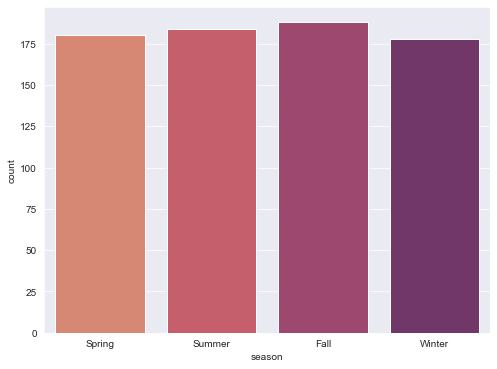

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes['season'], palette='flare')
plt.show()

### Month

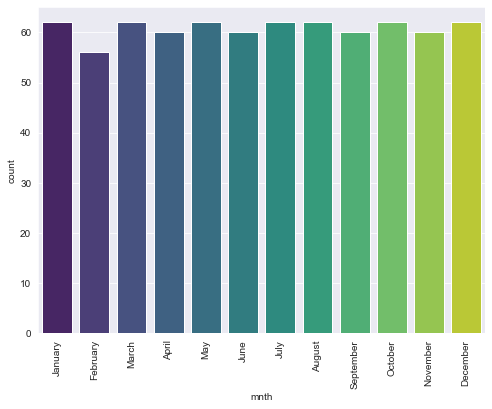

In [21]:
plt.figure (figsize=[8,6])
sns.countplot (boom_bikes['mnth'], palette= 'viridis')
plt.xticks(rotation=90)
plt.show()

### Weather

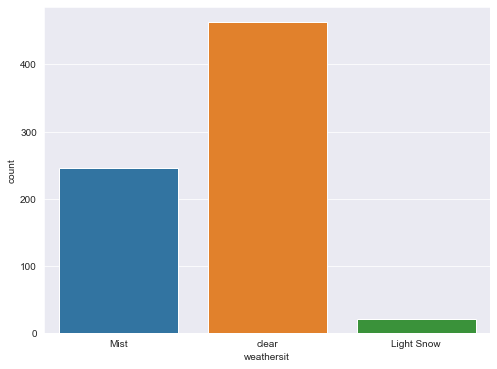

In [22]:
plt.figure(figsize=[8,6])
sns.countplot(boom_bikes['weathersit'])
plt.show()

### Weekday

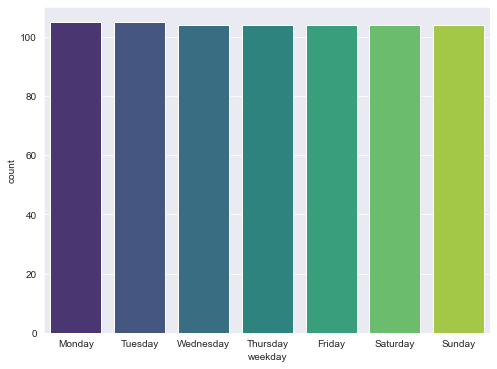

In [23]:
plt.figure (figsize=[8,6])
sns.countplot (boom_bikes['weekday'], palette= 'viridis')
plt.show()

### Holiday

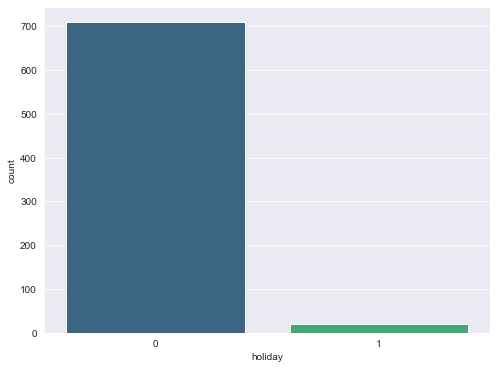

In [24]:
plt.figure (figsize=[8,6])
sns.countplot (boom_bikes['holiday'], palette= 'viridis')
plt.show()

### Working day

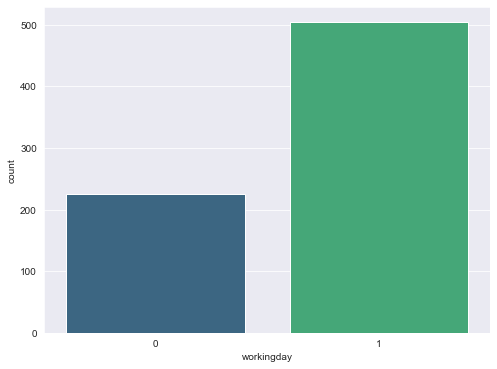

In [25]:
plt.figure (figsize=[8,6])
sns.countplot (boom_bikes['workingday'], palette= 'viridis')
plt.show()

### PLOTTING NUMERICAL VARIABLES

### Temperature

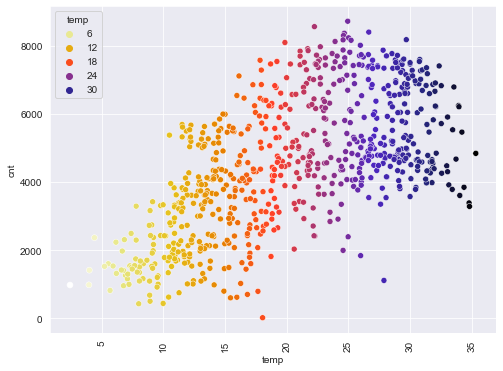

In [26]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes, x='temp', y='cnt', palette= "CMRmap_r",hue="temp")
plt.xticks(rotation= 90)
plt.show()

### Humidity

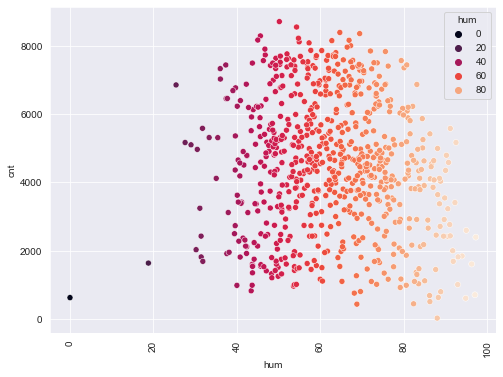

In [27]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes, x='hum', y='cnt', palette= "rocket",hue="hum")
plt.xticks(rotation= 90)
plt.show()

### Windspeed

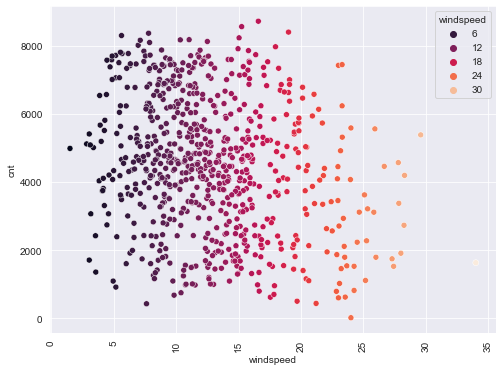

In [28]:
plt.figure(figsize=[8,6])
sns.scatterplot(data=boom_bikes, x='windspeed', y='cnt', palette= "rocket",hue="windspeed")
plt.xticks(rotation= 90)
plt.show()

### CATEGORICAL COLUMNS USING cnt (COUNT) AS A TARGET

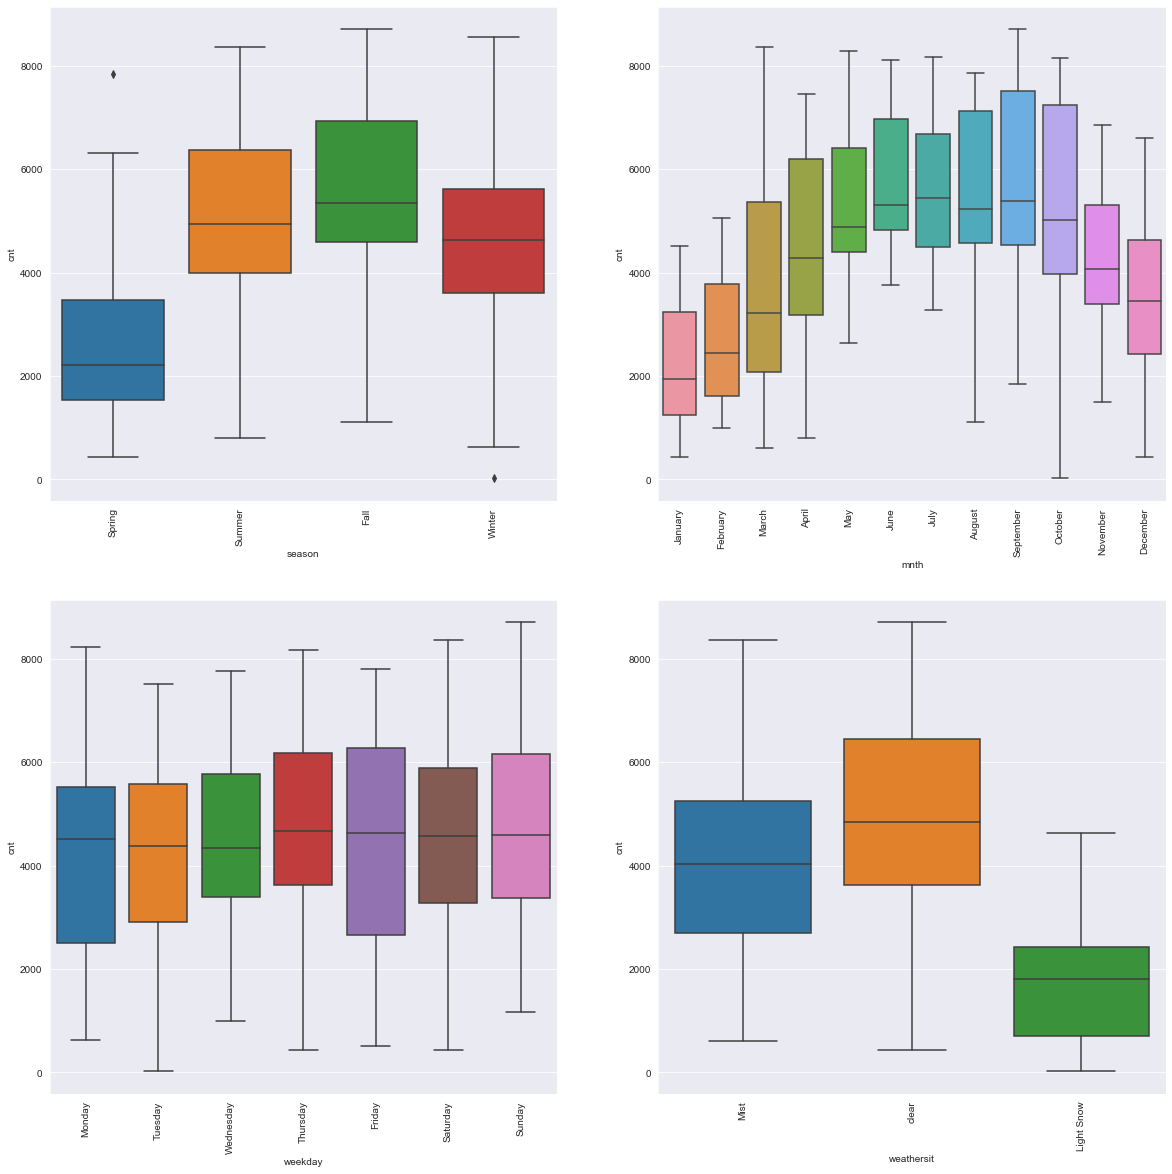

In [29]:
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
sns.boxplot(x='season', y= 'cnt', data= boom_bikes)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='mnth', y= 'cnt', data= boom_bikes)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x='weekday', y= 'cnt', data= boom_bikes)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y= 'cnt', data= boom_bikes)
plt.xticks(rotation=90)

plt.show()

### Visualization of Numerical Variables

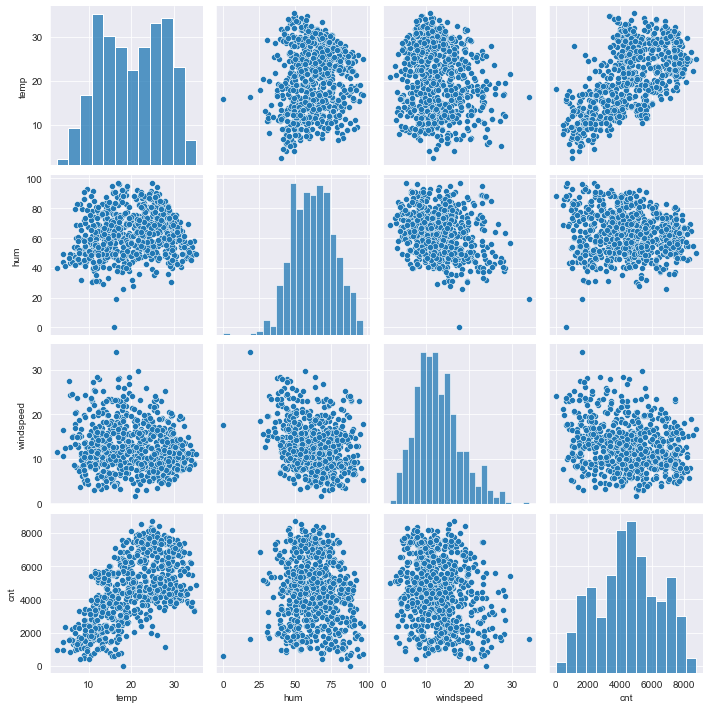

In [30]:
sns.pairplot(boom_bikes, vars= ['temp', 'hum', 'windspeed', 'cnt'])
plt.show()

### HEATMAP AND CORRELATION BETWEEN VARIABLES

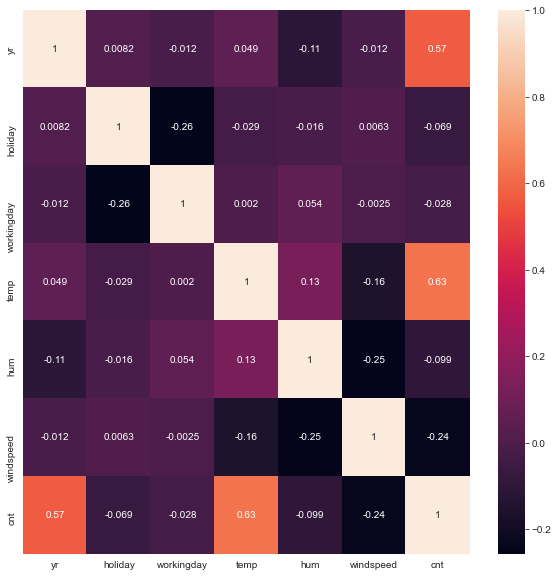

In [31]:
plt.figure(figsize=[10,10])
sns.heatmap(boom_bikes.corr(), annot= True)
plt.show()

## DATA PREPARATION

In [32]:
bike_categorical = boom_bikes.select_dtypes(exclude=['float64','int64'])
bike_categorical.head()


,season,mnth,weekday,weathersit
0,Spring,January,Monday,Mist
1,Spring,January,Tuesday,Mist
2,Spring,January,Wednesday,clear
3,Spring,January,Thursday,clear
4,Spring,January,Friday,clear


### DUMMY VARIABLES

In [33]:
# Creating dummy variable for the bike_categorical

bike_dummies= pd.get_dummies(bike_categorical, drop_first= True)
bike_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   season_Spring      730 non-null    uint8
 1   season_Summer      730 non-null    uint8
 2   season_Winter      730 non-null    uint8
 3   mnth_August        730 non-null    uint8
 4   mnth_December      730 non-null    uint8
 5   mnth_February      730 non-null    uint8
 6   mnth_January       730 non-null    uint8
 7   mnth_July          730 non-null    uint8
 8   mnth_June          730 non-null    uint8
 9   mnth_March         730 non-null    uint8
 10  mnth_May           730 non-null    uint8
 11  mnth_November      730 non-null    uint8
 12  mnth_October       730 non-null    uint8
 13  mnth_September     730 non-null    uint8
 14  weekday_Monday     730 non-null    uint8
 15  weekday_Saturday   730 non-null    uint8
 16  weekday_Sunday     730 non-null    uint8
 17  weekday_Thursday

In [34]:
# merging dummies to original dataframe

boom_bikes= pd.concat([boom_bikes, bike_dummies], axis= 1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,Spring,0,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,1
3,Spring,0,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,1
4,Spring,0,January,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# dropping off the columns like season, mnth, weekday and weathersit

boom_bikes.drop(['season','mnth', 'weekday','weathersit'], axis=1, inplace= True)
boom_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting the data into training and testing data set

In [36]:
# Dropping cnt for independent variable X

X= boom_bikes.drop('cnt', axis=1)
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#Shape of X
X.shape

(730, 28)

In [38]:
#Adding cnt to dependant variable Y

y= boom_bikes.cnt

#shape of y

y.shape

(730,)

In [39]:
#Splitting of train and test data taking X and Y.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [40]:
X_train.shape

(584, 28)

In [41]:
X_test.shape

(146, 28)

In [42]:
y_train.shape

(584,)

In [43]:
y_test.shape

(146,)

## Rescaling

In [44]:
# Required Libraires are already imported at the initial stage.

scaler= MinMaxScaler()

In [45]:
# Creating numerical_var for numerical variables

numerical_var= ['temp', 'hum', 'windspeed']
X_train[numerical_var]= scaler.fit_transform(X_train[numerical_var])

In [46]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
# Checking the description of numerical variables in X_train after scaling

X_train.describe()

# We can see that all the numerical variables are mapped between 0 and 1

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,0.251712,0.246575,0.250000,0.090753,...,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.342466,0.630137
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,0.434369,0.431387,0.433384,0.287504,...,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.474941,0.483181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,1.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### HEATMAP FOR CHECKING MULTICOLLINEARITY IN X_TRAIN

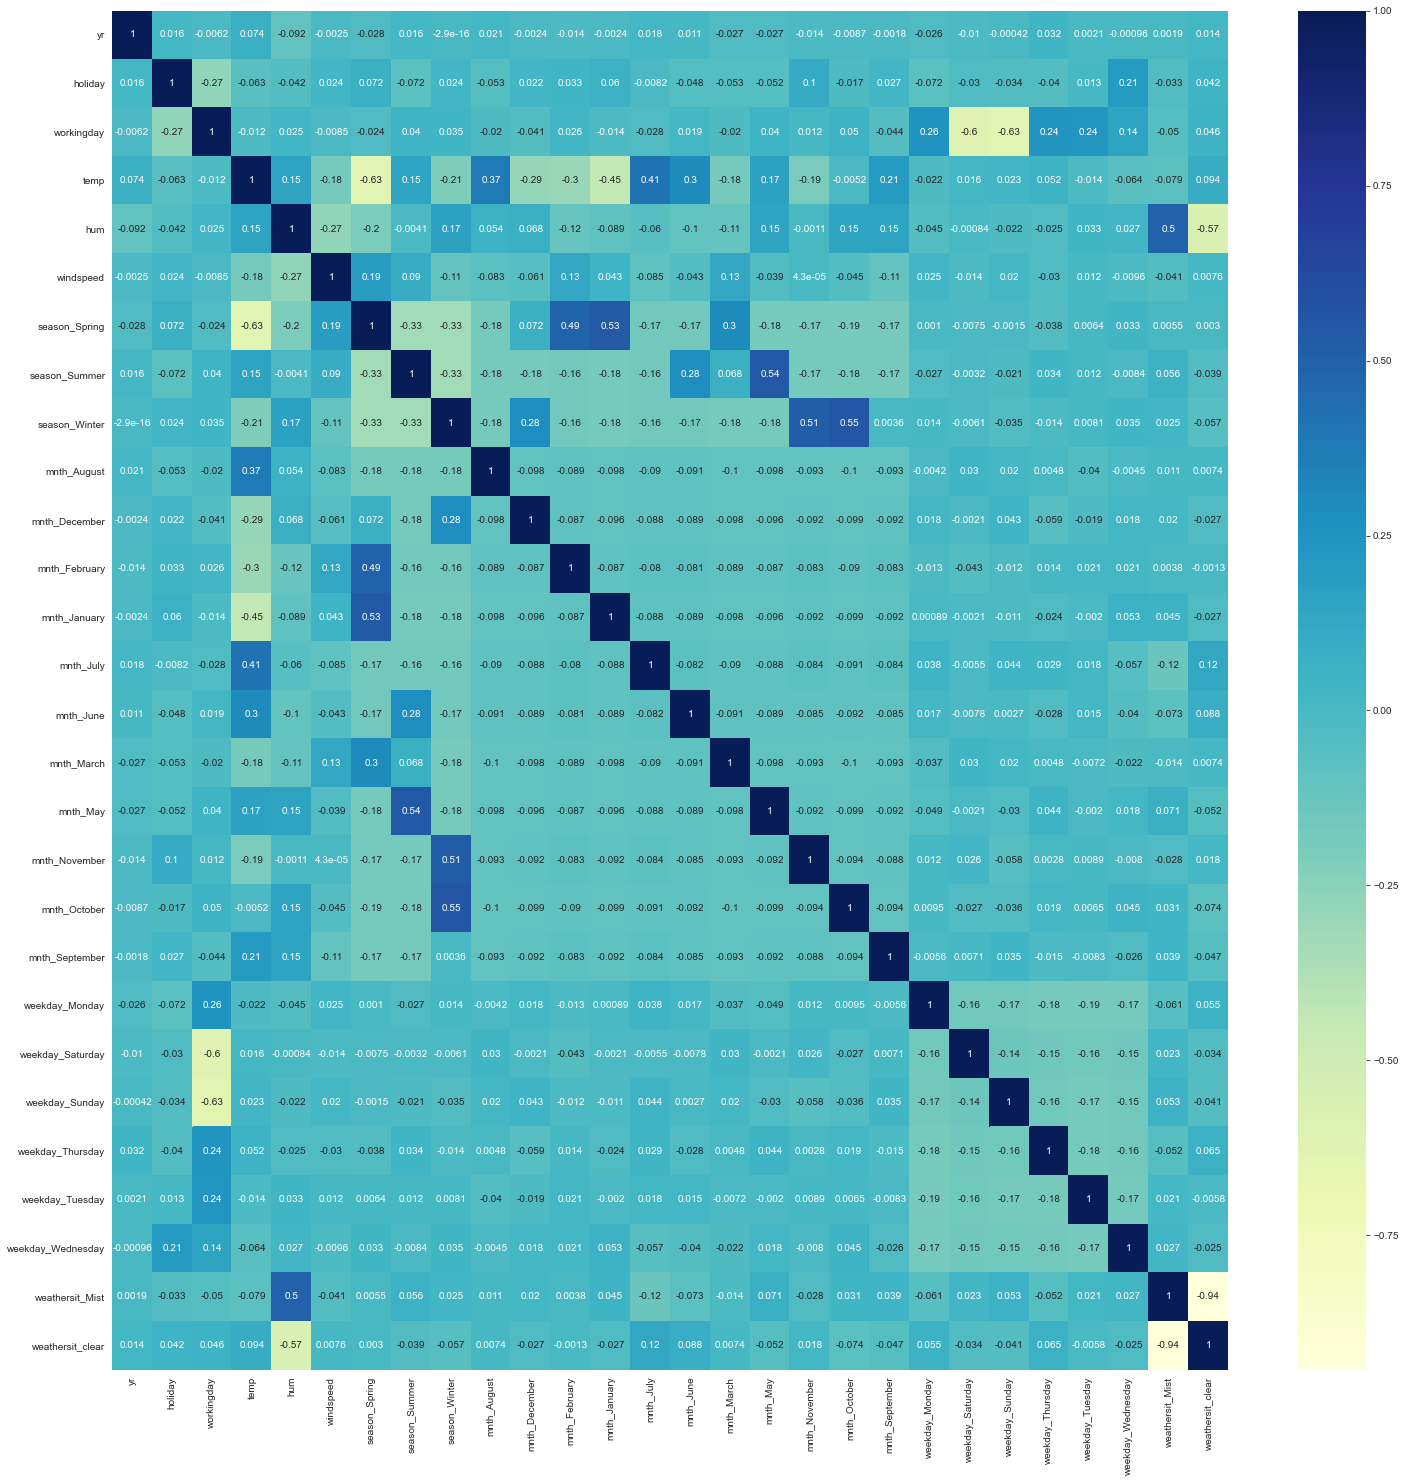

In [48]:
plt.figure(figsize=[25,25])
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### BUILDING A LINEAR MODEL

In [49]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
coeff_bike = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_bike

,Coefficient
yr,1982.071674
holiday,-1149.657967
workingday,-419.294219
temp,3874.783669
hum,-1307.859124
windspeed,-1540.543662
season_Spring,-489.122127
season_Summer,363.029589
season_Winter,957.980776
mnth_August,168.441166


In [51]:
print(regressor.intercept_)

1108.3919826801935


In [52]:
y_pred= regressor.predict(X_test)


In [53]:
df_bike= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_bike

,Actual,Predicted
184,6043,24911.245950
535,6211,40504.253125
299,2659,-48537.711744
221,4780,48750.345687
152,4968,46950.171612
...,...,...
219,4326,27254.418459
719,3623,-56039.334017
3,1562,-60063.234933
392,4023,-39010.591237


### RECURSIVE FEATURE ELIMINATION

In [54]:
# We are using RFE to select the final features for our model

In [55]:
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm, 15) #number of variables to be limited to 15
rfe= rfe.fit(X_train, y_train)

In [56]:
# List of selected variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_March', False, 13),
 ('mnth_May', False, 8),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Mist', True, 1),
 ('weathersit_clear', True, 1)]

In [57]:
(rfe.support_== True).sum()

15

In [58]:
(rfe.support_== False).sum()

13

In [59]:
# Columns having  RFE support as TRUE

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Mist',
       'weathersit_clear'],
      dtype='object')

In [60]:
# Columns having  RFE support as FALSE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [61]:
# Creating new data frame X_train_rfe with selected columns from RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]

X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Mist,weathersit_clear
367,1,0,0.113228,0.454701,0.695175,1,0,0,0,1,0,0,0,0,1
648,1,0,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,1
44,0,0,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,1
705,1,0,0.326094,0.787463,0.189819,0,0,1,1,0,0,0,0,1,0
379,1,0,0.133996,0.431945,0.449210,1,0,0,0,1,0,0,0,0,1


#### Function for building the model

In [62]:
def model (X,y):
    X= sm.add_constant(X) # Adding the constant
    lm= sm.OLS(y,X).fit() #fitting the model
    print(lm.summary()) #model summary
    return X

In [63]:
X_train_new= model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          9.71e-222
Time:                        18:40:38   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              605.0074    394.440  

In [64]:
# Function for VIF

def CVIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    vif['VIF']= round (vif['VIF'],2)
    vif= vif.sort_values(by='VIF', ascending= False)
    return(vif)

In [65]:
# VIF  for X_train_new

CVIF(X_train_new)

,Features,VIF
0,const,152.94
15,weathersit_clear,10.97
14,weathersit_Mist,9.49
6,season_Spring,5.39
3,temp,4.44
8,season_Winter,3.63
7,season_Summer,2.74
4,hum,1.96
12,mnth_November,1.68
10,mnth_January,1.64


In [66]:
# We can now drop the mnth_January column due to its high p value

X_train_new= X_train_rfe.drop(['mnth_January'], axis=1)

In [67]:
X_train_lm1= model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     225.8
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          1.37e-221
Time:                        18:40:38   Log-Likelihood:                -4705.8
No. Observations:                 584   AIC:                             9442.
Df Residuals:                     569   BIC:                             9507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              488.6563    393.445  

In [68]:
# Now checking the VIF for X_train_lm1

CVIF(X_train_lm1)

,Features,VIF
0,const,150.79
14,weathersit_clear,10.90
13,weathersit_Mist,9.44
6,season_Spring,5.38
3,temp,3.96
8,season_Winter,3.58
7,season_Summer,2.68
4,hum,1.95
11,mnth_November,1.65
10,mnth_July,1.51


In [69]:
# We can drop season_Spring due to its very high VIF value

X_train_new1= X_train_lm1.drop(['season_Spring'], axis=1)

X_train_lm2= model(X_train_new1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.8
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          7.65e-220
Time:                        18:40:38   Log-Likelihood:                -4712.8
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     570   BIC:                             9515.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -149.7173    357.802  

In [70]:
# Checking VIF for X_train_lm2

CVIF(X_train_lm2)

,Features,VIF
0,const,121.97
13,weathersit_clear,10.84
12,weathersit_Mist,9.42
4,hum,1.93
7,season_Winter,1.83
3,temp,1.72
10,mnth_November,1.58
9,mnth_July,1.45
6,season_Summer,1.36
8,mnth_December,1.33


In [71]:
# We can drop mnth_December considering its high p value


X_train_new2= X_train_lm2.drop(['mnth_December'], axis=1)

X_train_lm3= model(X_train_new2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     255.4
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          2.13e-220
Time:                        18:40:38   Log-Likelihood:                -4714.3
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     571   BIC:                             9511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -171.3281    358.227  

In [72]:
# Checking VIF for X_train_lm3

CVIF(X_train_lm3)

,Features,VIF
0,const,121.82
12,weathersit_clear,10.82
11,weathersit_Mist,9.41
4,hum,1.92
7,season_Winter,1.64
3,temp,1.61
8,mnth_July,1.45
9,mnth_November,1.41
6,season_Summer,1.35
10,mnth_September,1.20


In [73]:
# We can now drop the mnth_November column considering its high p value

X_train_new3= X_train_lm3.drop(['mnth_November'], axis=1)

X_train_lm4= model(X_train_new3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     277.7
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          3.98e-221
Time:                        18:40:38   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     572   BIC:                             9508.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -184.7168    358.538  

In [74]:
# Checking VIF for X_train_lm4

CVIF(X_train_lm4)

,Features,VIF
0,const,121.75
11,weathersit_clear,10.81
10,weathersit_Mist,9.41
4,hum,1.91
3,temp,1.60
8,mnth_July,1.45
6,season_Summer,1.35
7,season_Winter,1.27
9,mnth_September,1.19
5,windspeed,1.18


In [75]:
# Dropping the mnth_July column

X_train_new4= X_train_lm4.drop(['mnth_July'], axis=1)

X_train_lm5= model(X_train_new4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     301.4
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          8.52e-221
Time:                        18:40:39   Log-Likelihood:                -4719.3
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     573   BIC:                             9509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -217.3648    360.315  

In [96]:
# Checking VIF for X_train_lm5
CVIF(X_train_lm5)


,Features,VIF
0,const,121.61
10,weathersit_clear,10.78
9,weathersit_Mist,9.38
4,hum,1.90
3,temp,1.26
7,season_Winter,1.23
6,season_Summer,1.20
5,windspeed,1.18
8,mnth_September,1.11
1,yr,1.03


### RESIDUAL ANALYSIS

In [77]:
final_model= sm.OLS(y_train, X_train_lm5).fit()

In [78]:
#prediction of y_train_pred

y_train_pred= final_model.predict(X_train_lm5)

### Histogram for error terms

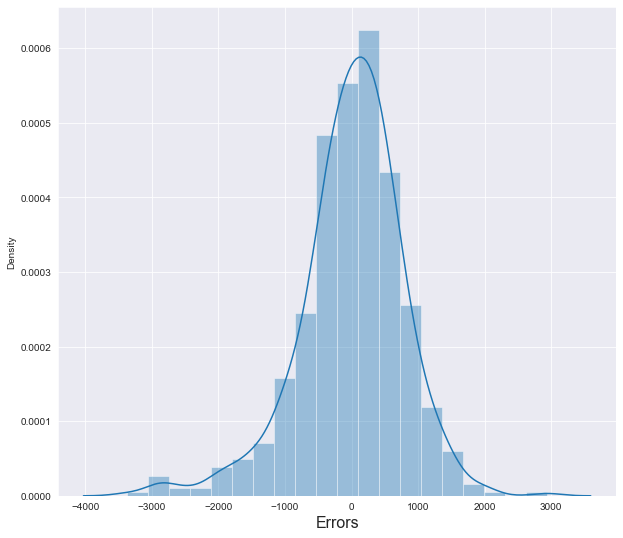

In [79]:
plt.figure(figsize=(10,9))
sns.distplot((y_train- y_train_pred), bins=20)
plt.xlabel('Errors',fontsize=16)
plt.show()

### We can observe that the error terms are normally distributed

### PREDICTIONS

In [80]:
# Scaling of test data

numerical_var_new=['temp', 'hum', 'windspeed']
X_test[numerical_var_new]= scaler.fit_transform(X_test[numerical_var_new])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Mist,weathersit_clear
184,0,1,0,0.837241,0.534223,0.150577,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.911423,0.470417,0.232972,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
299,0,0,0,0.496221,0.777843,0.446910,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.453268,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
152,0,0,0,0.821739,0.070765,0.687792,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [81]:
# Dropping const column

X_train_final= X_train_lm5.drop(['const'], axis=1)

# Adding a constant variable to test data
X_test_final=X_test[X_train_final.columns]
X_test_final=sm.add_constant(X_test_final)
X_test_final.head()

,const,yr,holiday,temp,hum,windspeed,season_Summer,season_Winter,mnth_September,weathersit_Mist,weathersit_clear
184,1.0,0,1,0.837241,0.534223,0.150577,0,0,0,1,0
535,1.0,1,0,0.911423,0.470417,0.232972,1,0,0,0,1
299,1.0,0,0,0.496221,0.777843,0.446910,0,1,0,1,0
221,1.0,0,0,0.890387,0.236659,0.453268,0,0,0,0,1
152,1.0,0,0,0.821739,0.070765,0.687792,1,0,0,0,1


In [82]:
# Making the predictions

y_pred_final= final_model.predict(X_test_final)
y_pred_final.shape

(146,)

In [98]:
X_test_final.drop(['const'], axis=1)

CVIF(X_test_final)

,Features,VIF
0,const,98.44
10,weathersit_clear,10.92
9,weathersit_Mist,8.43
4,hum,2.24
7,season_Winter,1.30
5,windspeed,1.27
3,temp,1.26
6,season_Summer,1.22
8,mnth_September,1.22
1,yr,1.07


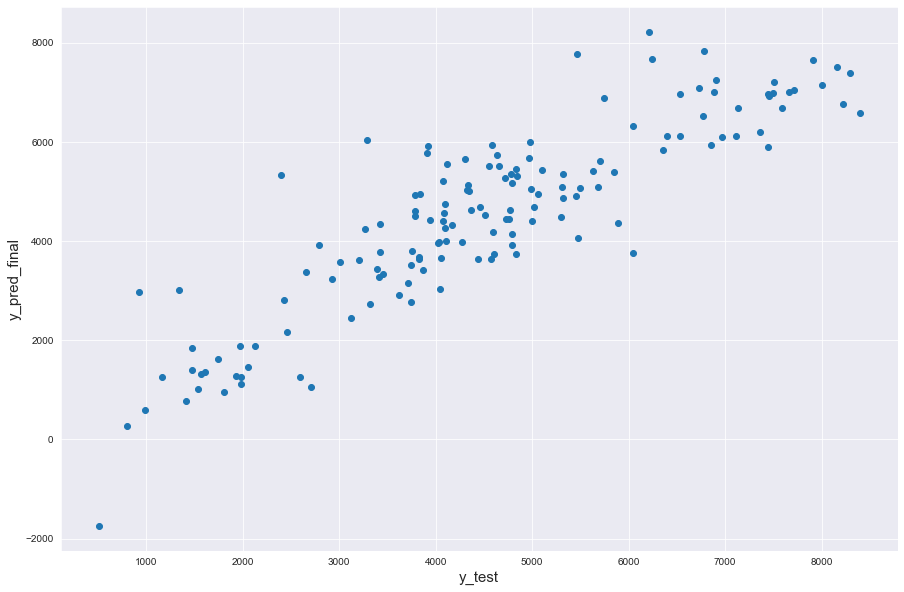

In [83]:
# Plotting y_test and y_pred

plt.figure(figsize=[15,10])
plt.scatter(y_test, y_pred_final)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred_final', fontsize = 15)
plt.show()

### Analyzing R SQUARE, ADJUSTED R SQUARE and ROOT MEAN SQUARED ERROR (RMSE)

In [84]:
from sklearn.metrics import r2_score

In [85]:
# Evaluating R-square
R_Square_test= r2_score(y_test,y_pred_final)
R_Square_test

0.7553809583163004

In [86]:
# Calculating Adjusted R square

Adj_Rquare_test= 1- (1-R_Square_test)*(len(y_train)-1)/(len(y_train)- X_train.shape[1]-1)
Adj_Rquare_test

0.7430398174746002

In [87]:
# Finding MAE, MSE and RMSE

from sklearn import metrics
from sklearn.metrics import mean_squared_error

print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_final))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_final))
print ('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_final)))

Mean Absolute Error: 709.7502138430989
Mean Squared Error: 830830.2367410278
Root Mean Squared Error: 911.4988956334658


## Regression Plot

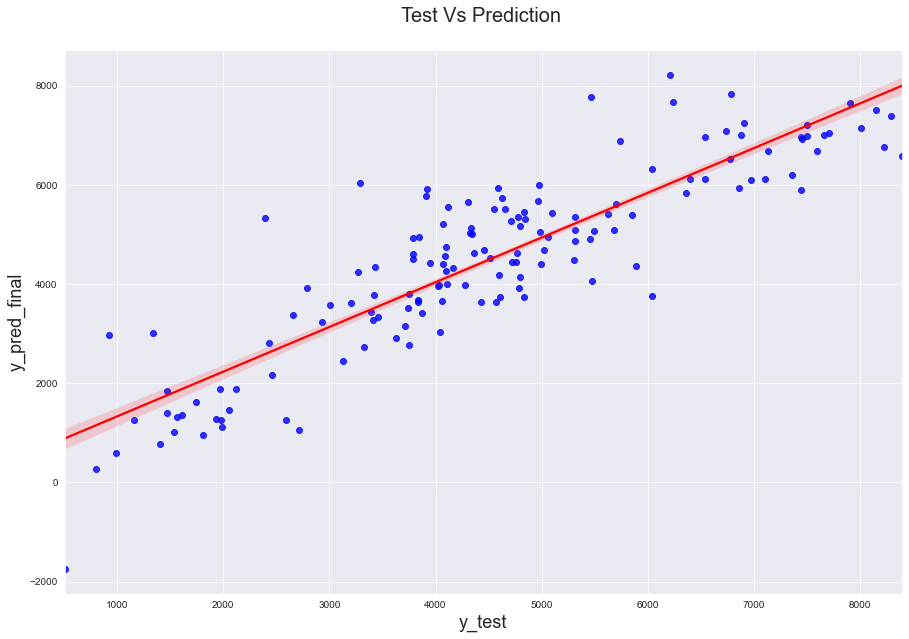

In [88]:
plt.figure(figsize=(15,10))
sns.regplot(x= y_test, y= y_pred_final, ci=68, fit_reg= True, scatter_kws={'color':'blue'},line_kws={'color':'red'})

plt.title( 'Test Vs Prediction \n', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred_final', fontsize=18)
plt.show()

### Equation for best fitted line is :

#### cnt = 1955.38 X yr - 923.61 X holiday + 5117.02 X temp - 1491.49 X hum - 1575.10 X windspeed + 802.70 X season_Summer +1269.15 X season_Winter + 867.85 X mnth_September + 1653.61 X weathersit_Mist + 2085.33 X weathersit_clear

### Conclusion